# Objective

To do a **Market basket analysis** by implementation of Apriori algorithm to find association rules amongst item sets in a retail grocery store.

Framework used is MapReduce

Dataset- Groceries dataset from Kaggle

Concepts Used **:**

1. Support    : Probability of finding a group in dataset

2. Confidence :  Conditional Probability of finding the group

3. Lift       : Helps identifying correlation




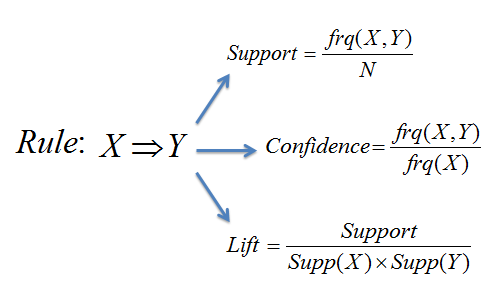

In [8]:
%%file map.py

import sys   
import csv

iterator = iter(sys.stdin.readline, "")
next(iterator)  # Gets the header from the .csv file and ignores it

for line in sys.stdin:
    line = line.strip()    ## removes any leading and trailing whitespaces
    splits = line.split(",") 
    splits = [i for i in splits if i]    
    for c1 in splits:
        if(not(c1.isdigit())):     # removing id
            print('%s\t\t%s'%(c1,1))    

Overwriting map.py


# Taking single count

In [9]:
!type groceries.csv | python map.py | sort

abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
abrasive cleaner		1
artif. sweetener		1
artif. sweetener		1
artif. sweetener		1
artif. sweetener		1
artif. sweetener		1
artif. sweetener		1
artif. sweetener		1
artif. sweetener		1
artif. sweetener		1
artif. sweetener		1
artif. sweetener		1
artif. sweetener		1
artif. sweetener		1
artif. sweetener		1
artif. sweetener		1



 Minimum support threshold   = 5% = (5*9835)/100
                             = 492

Minimum confidence threshold = 22%

In [10]:
%%file reduce.py

import sys

c1=None
l1=None
support_count=0
frequent_items_dict = {}

for line in sys.stdin:
    line = line.strip()
    c1, local_count = line.split("\t\t")
    try:
        local_count=int(local_count)  ## string to integer
    except ValueError:
        continue
    if(c1==l1):        
        support_count+=local_count
    else:
        if(l1 and support_count>=393):         ## for every candidate itemset if its support count is greater than or equal to the minimum support count then it is considered as a frequent itemset
            print ('%s\t\t%s' % (l1, support_count))  ## if the candidate itemset is being encountered for the first time then its support is checked for the minimum support and then included as a frequent itemset
            frequent_items_dict[l1] = support_count ## support counts are stored in a dictionary
        l1=c1
        support_count=local_count
#if(support_count>=393):                 ## this is for the candidate itemset which is being encountered again and again and its support count is increased by the local count
 #   print ('%s\t\t%s' % (l1, support_count))   ## and here also its support count is checked for being greater than the minimum support
  #  frequent_items_dict[l1] = support_count
    
with open ("freq_items.txt","w") as f:    ## all the frequent itemsets of size 1 and its support count is written in a file for confidence calculation of the association rules later
    f.write(str(frequent_items_dict))

    
## support count is given as the number of times the itemset appears in the entire database

Overwriting reduce.py


Retaining words occuring more than minimum support level

In [11]:
!type groceries.csv | python map.py | sort | python reduce.py

beef		516
bottled beer		792
bottled water		1087
brown bread		638
butter		545
canned beer		764
chicken		422
chocolate		488
citrus fruit		814
coffee		571
curd		524
domestic eggs		624
frankfurter		580
frozen vegetables		473
fruit/vegetable juice		711
margarine		576
napkins		515
newspapers		785
other vegetables		1903
pastry		875
pip fruit		744
pork		567
rolls/buns		1809
root vegetables		1072
sausage		924
shopping bags		969
soda		1715
tropical fruit		1032
whipped/sour cream		705
white bread		414
whole milk		2513
yogurt		1372


In [12]:
%%file map_1.py

import sys
import csv

l1_list = []
for line in sys.stdin:
    line = line.strip();
    l1, support_count = line.split("\t\t")
    l1_list.append(l1)       ## list of L1 frequent itemsets

c2_list = []
for i in range(len(l1_list)):                        ## This is the join step wherein L1 itemset is being joined by L1 itemset having 0 item in common 
    for j in range (i+1,len(l1_list)):
        c2_list.append([l1_list[i],l1_list[j]])      ## This list contains all the possible join combination formed from L1 itemsets as the possible candidate itemset but still its subsets needs to be checked for whether they are frequent or not
        
c2_newList=[]     # 2-D list of all possible 2-elements which are in L-1 
for c2 in c2_list:   ## this checks for whether the subset of the possible candidate itemset is frequent or not and if they are not frequent then the candidate itemset also cannot be frequent so they are prunned
    if(c2[0] not in l1_list or c2[1] not in l1_list):
        print("{c2} cannot be included in the candidate itemset of size 2 because according to the apriori property any non-empty subsets of itemset must be frequent")  ## prune step
    else:
        c2_newList.append(c2)
        


with open('groceries.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)
    for row in csvreader:
        for c2 in c2_newList:
            if(c2[0] in row and c2[1] in row):  ## The candidate itemset of size 2 is scanned through the database and whenever it occurs its local count is taken to be 1
                print ('%s\t\t%s' % (c2,1))

Overwriting map_1.py


Keeping count of words in pair size of 2

In [13]:
!type groceries.csv | python map.py | sort | python reduce.py | python map_1.py | sort

['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled beer']		1
['beef', 'bottled be

In [14]:
%%file reduce_1.py

import sys

c2=None
l2=None
support_count=0


for line in sys.stdin:
    line = line.strip()
    c2, local_count = line.split("\t\t")
    c2 = c2.strip('][').replace("'","").split(', ')  ## to convert string of lists into list of strings
    try:
        local_count=int(local_count)
    except ValueError:
        continue
    if(c2==l2):
        support_count+=local_count
    else:
        if(l2 and support_count>=393):               ## here also the support count of the candidate itemset of size 2 is checked for the minimum support and whenever it is greater than 
            print ('%s\t\t%s' % (l2, support_count))  ## or equal to the minimum support then the candidate itemset is taken as a frequent itemset
        l2=c2
        support_count=local_count
if(support_count>=393):
    print ('%s\t\t%s' % (l2, support_count))

Overwriting reduce_1.py


In [15]:
!type groceries.csv | python map.py | sort | python reduce.py | python map_1.py | sort | python reduce_1.py

['other vegetables', 'rolls/buns']		419
['other vegetables', 'root vegetables']		466
['other vegetables', 'whole milk']		736
['other vegetables', 'yogurt']		427
['rolls/buns', 'whole milk']		557
['root vegetables', 'whole milk']		481
['soda', 'whole milk']		394
['tropical fruit', 'whole milk']		416
['whole milk', 'yogurt']		551


In [35]:
%%file map_2.py

import sys
import csv

l2_list = []

for line in sys.stdin:
    line = line.strip()
    l2, support_count = line.split("\t\t")
    l2 = l2.strip('][').replace("'","").split(', ')
    l2_list.append(l2)
    
c3_list = []   
for i in range(len(l2_list)-1):  ## join step
    for j in range(1,len(l2_list)):
        if(i!=j): c3_list.append(list(set(l2_list[i]+l2_list[j])))  ## list of possible join combinations of two L2 itemsets to form itemsets of size 3 having 1 item in common


c3_subsetList = []
for c3 in c3_list:
    c3_subset=[]
    for i in range(len(c3_list)-1):
        for j in range(1,len(c3_list)-1):
            if(i!=j and j<len(c3) and i<len(c3)):
                c3_subset.append([c3[i],c3[j]]) 
    c3_subsetList.append(c3_subset)                  ## this makes all the subset of the above itemset to check for if its frequent or not

c3_newList = []
for i,c3 in enumerate(c3_subsetList):  ## prune step
    if(c3[0] not in l2_list or c3[1] not in l2_list or c3[2] not in l2_list ):  ## if the subset is not frequent then it is removed from the candidate itemset
        print(f"\nThe subsets of itemset {c3_list[i]} low confidence so it is dropped")
    else:
        c3_newList.append(c3_list[i])   ## if all the subset of a itemset is frequent then it is taken as a candidate itemset 
                    
if(len(c3_newList)==0):
    print("\n\nThere is no possible candidate itemset of size 3")  
else:
    with open('groceries.csv', 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)
        for row in csvreader: ## if there exists any candidate itemset then it is scanned through the database to check for its local count and whenever it is found its count is taken as one
            for c3 in c3_newList:
                if(c3[0] in row and c3[1] in row and c3[2] in row):
                    print ('%s\t\t%s' % (c3,1))
    
### Here there was no candidate itemset of size 3 so the iterative process of apriori algorithm was stopped and the final frequent itemsets of size 2 and the association rules were found further

Overwriting map_2.py


In [36]:
!type groceries.csv | python map.py | sort | python reduce.py | python map_1.py | sort | python reduce_1.py | python map_2.py


The subsets of itemset ['rolls/buns', 'other vegetables', 'root vegetables'] low confidence so it is dropped

The subsets of itemset ['rolls/buns', 'other vegetables', 'whole milk'] low confidence so it is dropped

The subsets of itemset ['rolls/buns', 'yogurt', 'other vegetables'] low confidence so it is dropped

The subsets of itemset ['rolls/buns', 'other vegetables', 'whole milk'] low confidence so it is dropped

The subsets of itemset ['rolls/buns', 'other vegetables', 'whole milk', 'root vegetables'] low confidence so it is dropped

The subsets of itemset ['rolls/buns', 'soda', 'other vegetables', 'whole milk'] low confidence so it is dropped

The subsets of itemset ['rolls/buns', 'other vegetables', 'whole milk', 'tropical fruit'] low confidence so it is dropped

The subsets of itemset ['rolls/buns', 'yogurt', 'other vegetables', 'whole milk'] low confidence so it is dropped

The subsets of itemset ['whole milk', 'other vegetables', 'root vegetables'] low confidence so it is dr

# Items following mentioned 2 properties are considered frequent
# i) support count is greater than the minimum support threshold 
# ii) No superset of is a frequent itemset

In [23]:
!type groceries.csv | python map.py | sort | python reduce.py | python map_1.py | sort | python reduce_1.py  

['other vegetables', 'rolls/buns']		419
['other vegetables', 'root vegetables']		466
['other vegetables', 'whole milk']		736
['other vegetables', 'yogurt']		427
['rolls/buns', 'whole milk']		557
['root vegetables', 'whole milk']		481
['soda', 'whole milk']		394
['tropical fruit', 'whole milk']		416
['whole milk', 'yogurt']		551


# ASSOCIATION RULES

In [24]:
%%file map_3.py

import sys
 

l2_list=[]
support_list = []

for line in sys.stdin:
    line = line.strip()
    l2, support_count = line.split("\t\t")
    l2 = l2.strip('][').replace("'","").split(', ')
    l2_list.append(l2)  ## list of frequent itemsets of size 2 
    try:
        support_count=int(support_count)
        support_list.append(support_count)  ## list of support count of the frequent itemsets of size 2
    except ValueError:
        continue

with open ("freq_items.txt", "r") as f:  ## this file is read to get the support count of the frequent itemset of size 1
    itemset = f.read()
itemset = eval(itemset)   ## converts string to dictionary
## support count is stored in a dictionary

## generation of association rules
## for every subset s of l association rule will be given as s->(l-s)   [s is the antecedent and l-s is the consequence]
## for example association rule of {'other vegetables', 'whole milk'} will be given as {'other vegetables'} -> ({'other vegetables', 'whole milk'} - {'other vegetables'})

for i,l2 in enumerate(l2_list):  ## calculates the confidence percentage and the lift of the different possible association rules which is given as 
    print('%s\t\t%s'%(l2[0]+"=>"+l2[1],[((support_list[i]/itemset[l2[0]])*100),(1+support_list[i]*100/(itemset[l2[0]]* itemset[l2[1]] ))]))   ## confidence percentage of A=>B is the number of times A and B together occurs in the entire database by the number of times A occurs in the entire database multiplid by 100
    #print(*[ l2[0]+"=>"+l2[1],"     ",((support_list[i]/itemset[l2[0]])*100),"  ",(support_list[i]*100/(itemset[l2[0]]* itemset[l2[1]] ))])
    print('%s\t\t%s'%(l2[1]+"=>"+l2[0],[((support_list[i]/itemset[l2[1]])*100),(support_list[i]*100/(itemset[l2[0]]* itemset[l2[1]] ))]))   ## confidence percentage of A=>B - (support(AUB)/support(A))*100 and lift is confidence percentage of A=>B divided by support(B)
    #print(*[ l2[1]+" => "+l2[0],"    ",((support_list[i]/itemset[l2[1]])*100),"  ",(support_list[i]*100/(itemset[l2[0]]* itemset[l2[1]] ))])   ## confidence percentage of A=>B - (support(AUB)/support(A))*100 and lift is confidence percentage of A=>B divided by support(B)

    

Overwriting map_3.py


In [20]:
!type groceries.csv | python map.py | sort | python reduce.py | python map_1.py | sort | python reduce_1.py | python map_3.py | sort

other vegetables=>rolls/buns		[22.01786652653705, 1.0121712916122372]
other vegetables=>root vegetables		[24.487651077246454, 1.0228429580944463]
other vegetables=>whole milk		[38.67577509196006, 1.0153902805777795]
other vegetables=>yogurt		[22.438255386232264, 1.0163544135468165]
rolls/buns=>other vegetables		[23.16196793808734, 0.012171291612237173]
rolls/buns=>whole milk		[30.790491984521832, 1.012252483877645]
root vegetables=>other vegetables		[43.47014925373134, 0.02284295809444632]
root vegetables=>whole milk		[44.86940298507462, 1.0178549156327397]
soda=>whole milk		[22.973760932944607, 1.009141966149202]
tropical fruit=>whole milk		[40.310077519379846, 1.0160406197848706]
whole milk=>other vegetables		[29.287703939514525, 0.015390280577779572]
whole milk=>rolls/buns		[22.16474333465977, 0.01225248387764498]
whole milk=>root vegetables		[19.140469558296857, 0.017854915632739606]
whole milk=>soda		[15.678471945881418, 0.009141966149201992]
whole milk=>tropical fruit		[16.553919

In [21]:
%%file reduce_3.py

import sys

ans_list = []
for line in sys.stdin:
    line = line.strip()
    rule, percent_confidence = line.split("\t\t")
    percent_confidence = percent_confidence.strip('][').replace("'","").split(', ')
    try:
        percent_confidence[0] = float(percent_confidence[0])  ## converts string into float value
    except ValueError:
        continue
    ans_list.append([rule,percent_confidence])
ans_list = sorted(ans_list, key = lambda x: x[1][0], reverse=True)  ## sorted according to the descending order of the confidence percentage
        
for ans in ans_list:
    if(ans[1][0]>=21):
        print('%s\t\t%s' % (ans[0],ans[1][0]))   ## only those association rules are taken which have confidence percentage greater than or equal to the minimum confidence threshold which is taken here as 22%
    
    

Overwriting reduce_3.py


# Association rules meeting threshold Confidence criteria

In [22]:
!type groceries.csv | python map.py | sort | python reduce.py | python map_1.py | sort | python reduce_1.py | python map_3.py | sort | python reduce_3.py 

root vegetables=>whole milk		44.86940298507462
root vegetables=>other vegetables		43.47014925373134
tropical fruit=>whole milk		40.310077519379846
yogurt=>whole milk		40.160349854227405
other vegetables=>whole milk		38.67577509196006
yogurt=>other vegetables		31.122448979591837
rolls/buns=>whole milk		30.790491984521832
whole milk=>other vegetables		29.287703939514525
other vegetables=>root vegetables		24.487651077246454
rolls/buns=>other vegetables		23.16196793808734
soda=>whole milk		22.973760932944607
other vegetables=>yogurt		22.438255386232264
whole milk=>rolls/buns		22.16474333465977
other vegetables=>rolls/buns		22.01786652653705
whole milk=>yogurt		21.92598487863112


# 1. There is an association between Root Vegetables and Milk, people buying root vegetables are likely to buy milk as well
# 2. There is an association between Tropical Fruit and Milk, people buying Tropical Fruit are likely to buy milk as well
# 3. There is an association between  Yogurt  and Other Vegetables, people buying Yogurt are likely to buy Other Vegetables as well  
# 4. There is an association between  Milk and Roll Buns, people buying milk are likely to buy roll buns as well  
# 5. There is an association between Soda and Milk, people buying Soda are likely to buy milk as well

